In [20]:
import math
dataPath='/Users/buettner/Desktop/Naive_Bayes_Discorsi/discorsi.txt'
alpha=0.00001
import pandas as pd
from pandas import DataFrame

In [21]:
#gets the words in a specific paragraph
def bagOfWords(email):
    words=[]
    words = words + email.split(' ')
    return(words)

In [22]:
#counts the words in a specific paragraph
def processEmail(email, label):
    global positiveTotal, negativeTotal
    for word in bagOfWords(email):
        if label == 'SIMP':
            trainPositive[word] = trainPositive.get(word, 0) + 1
            positiveTotal += 1
        else:
            trainNegative[word] = trainNegative.get(word, 0) + 1
            negativeTotal += 1


In [23]:
def train(trainData):
    global pA, pNotA, numSpam, total
    total = 0
    numSpam = 0
    for key in trainData:
        for paragraph in trainData[key]:
         if key == 'SIMP':
            numSpam += 1
         total += 1
         processEmail(paragraph, key)
    pA = numSpam/total
    pNotA = (total-numSpam)/total
    print(pA, pNotA)

In [24]:
#gives the conditional probability p(B_i | A_x)
def conditionalWord(word, spam):
    if spam:
        return (trainPositive.get(word,0)+alpha)/(positiveTotal+alpha*numSpam)
    else:
        return (trainNegative.get(word,0)+alpha)/(negativeTotal+alpha*(total-numSpam))

In [25]:
#gives the conditional probability p(B | A_x)
def conditionalEmail(email, spam, analysis):
    global matrix
    result = 1
    for word in bagOfWords(email):
        result += math.log(conditionalWord(word, spam))
        if analysis:
            print(math.log(conditionalWord(word, spam)), word, spam, 'result', result)
    return result

In [26]:
#classifies a new paragraph as Simp or not Simp
def classify(email, analysis):
    isSpam = pA * conditionalEmail(email, True, analysis) # P (A | B)
    notSpam = pNotA * conditionalEmail(email, False, analysis) # P(¬A | B)
    #print(isSpam, notSpam)
    return isSpam > notSpam

In [27]:
#prepare training and test set from input data

how_many=500
pararaphs={'SIMP':[], 'SAGR':[], 'SALV':[]}
testMails={}
trainPositive={}
trainNegative={}
positiveTotal, negativeTotal = 0,0

with open(dataPath, encoding="utf8", errors='ignore') as fd:
        for line in fd:
            #print(line[:5])
            if line[:5]=='SIMP.':
                  pararaphs['SIMP'].append(line[6:])
            elif line[:5]=='SAGR.':
                  pararaphs['SAGR'].append(line[6:])
            elif line[:5]=='SALV.':
                  pararaphs['SALV'].append(line[6:])
            else:
                  print(line)


pararaphs_train={'SIMP':pararaphs['SIMP'][0:48], 'SAGR':pararaphs['SAGR'][:24], 'SALV':pararaphs['SALV'][:24]}

#for item in Spam+noSpam:
    #print(item)
#    files = glob.glob(dataPath+'/'+item+'/*')
# iterate over the list getting each file 
#    print(len(files))
#    for i in range(0,how_many):
#        if item in Spam:
#            emailType='Spam'
#        else:
#            emailType='noSpam'
#        if i > round(how_many*0.3):
#             trainMails[files[i]]=emailType
#        else:        
#            testMails[files[i]]=emailType
print('Simplicio', len(pararaphs['SIMP']), '\nSagredo', len(pararaphs['SAGR']), '\nSalviati', len(pararaphs['SALV']))

Simplicio 91 
Sagredo 116 
Salviati 179


In [28]:
train(pararaphs_train)

0.5 0.5


for mail in testMails:
    print(classify(mail), testMails[mail])

classify('/Users/buettner/Desktop/Naive_Bayes_Spam/data/easy_ham/00001.7c53336b37003a9286aba55d2945844c')

In [29]:
classify('txgt Quello che ora accade al Sig. Simplicio, avvenne per alcun tempo a me, credendo che le resistenze di solidi simili fusser simili, sin che certa, nè anco molto fissa o accurata, osservazione mi pareva {30} rappresentarmi, ne i solidi simili non mantenersi un tenore eguale nelle loro robustezze, ma i maggiori esser meno atti a pa', 1)

-19.199087988848785 txgt True result -18.199087988848785
-19.199087988848785 Quello True result -37.39817597769757
-3.1011949431671733 che True result -40.49937092086474
-6.993010343331111 ora True result -47.492381264195856
-19.199087988848785 accade True result -66.69146925304464
-6.993010343331111 al True result -73.68447959637575
-6.587546901882669 Sig. True result -80.27202649825843
-19.199087988848785 Simplicio, True result -99.47111448710722
-19.199087988848785 avvenne True result -118.670202475956
-4.595119615974889 per True result -123.2653220919309
-19.199087988848785 alcun True result -142.4644100807797
-6.299865662761791 tempo True result -148.76427574354148
-5.20125504075757 a True result -153.96553078429903
-19.199087988848785 me, True result -173.16461877314782
-19.199087988848785 credendo True result -192.3637067619966
-3.1011949431671733 che True result -195.46490170516378
-4.741723018396465 le True result -200.20662472356025
-19.199087988848785 resistenze True result 

False

In [30]:
print('       NonSimp                 Simp')
for key in pararaphs:
    nonSIMP, SIMP = 0, 0
    for item in pararaphs[key]:
    #print(item)
    #files = glob.glob(dataPath+'/'+item+'/*')
# iterate over the list getting each file 
    #for fle in files:
        #print(classify(item), '\n', item[:20])
        if classify(item, 0):
            SIMP += 1
        else:
            nonSIMP +=1
    nonSIMP_perc=nonSIMP/(nonSIMP+SIMP)*100
    SIMP_perc=SIMP/(nonSIMP+SIMP)*100
    print(key,':', nonSIMP_perc, SIMP_perc)            
            

       NonSimp                 Simp
SIMP : 34.065934065934066 65.93406593406593
SAGR : 82.75862068965517 17.24137931034483
SALV : 79.88826815642457 20.11173184357542


In [12]:
#trainNegative['from']

In [14]:
# Libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [44]:
simp_text=''
for lines in pararaphs['SAGR']:
    simp_text += lines
print(simp_text)

V. S. non s'inganna punto: ed io, come per natura curioso, frequento per mio diporto la visita di questo luogo e la pratica di questi che noi, per certa preminenza che tengono sopra 'l resto della maestranza, domandiamo proti; la conferenza de i quali mi ha più volte aiutato nell'investigazione della ragione di effetti non solo maravigliosi, ma reconditi ancora e quasi inopinabili. E vero che tal volta anco mi ha messo in confusione ed in disperazione di poter penetrare come possa seguire quello che, lontano da ogni mio {20} concetto, mi dimostra il senso esser vero. E pur quello che poco fa ci diceva quel buon vecchio è un dettato ed una proposizione ben assai vulgata; ma però io la reputava in tutto vana, come molte altre che sono in bocca de i poco intelligenti, credo da loro introdotte {S. 50} per mostrar di saper dir qualche cosa intorno a quello di che non son capaci.
Di cotesto intendo, e sopra tutto dell'ultima conclusione {10} ch'ei soggiunse, la quale io ho sempre stimata con

In [45]:
# Create the wordcloud object
wordcloud = WordCloud(width=1000, height=800,  background_color="white", margin=0).generate(simp_text)


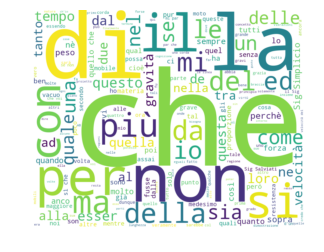

In [46]:
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

Accidente in vero maraviglioso e veramente praeter spem, quando però fusse derivato dall'aggiugnervi il nuovo sostegno di mezzo.
Se il negozio procede come voi dite, intendo bene che i {20} filamenti nel legno, che son lunghi quanto l'istesso legno, posson renderlo gagliardo e resistente a gran forza che se gli faccia per romperlo; ma una corda composta di fili di canapa non più lunghi di due o tre braccia l'uno, come potrà ridursi alla lunghezza di cento, restando tanto gagliarda? In oltre vorrei anco sentire la vostra opinione intorno all'attaccamento delle parti se i metalli, delle pietre e di altre materie prive di tali filamenti, che pur, s'io non m'inganno, è anco più tenace.
Ma già che concedete questo assioma ad Aristotele, non credo che siate per negargliene un altro, bellissimo e vero: e questo è, che {30} la natura non intraprende a voler fare quello che repugna ad esser fatto, dal qual pronunziato mi par che dependa la soluzione del vostro dubbio. Perchè dunque a sè medesim